# Lab3.2 Evaluation for classification tasks (Precision, Recall, and F<sub>1</sub>)

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

RMA/Text Mining MA, Introduction to HLT

Most NLP tasks, e.g., part of speech tagging, sentiment analysis, named-entity recognition, etc., are defined as a classification task. The goal is to classify a textual unit, e.g., word, lemma, sentence, document, etc., into some category. It is essential that we evaluate NLP systems thoroughly, which gives us insight into their strengths and weaknesses. In this notebook, we show how to compute the most crucial evaluation metrics, which are Precision, Recall, and F<sub>1</sub> or F-measure.

**At the end of this notebook, you will be able to compute for n-class classification tasks**:
* Precision (micro + macro)
* Recall (micro + macro)
* F<sub>1</sub> (micro + macro)

## Installation
Please make sure you have the **sklearn** package installed (**conda install sklearn**, or **pip install sklearn**, or via **Anaconda Navigator**)

In [1]:
import sklearn

## Classification: an example
Natural Language is very complex. Each specific NLP task, therefore, only focuses on a small portion of this complexity. Hence, each NLP task has a **task definition**, which provides valuable information about how we should approach the task.

Lets consider the task of sentiment analysis. In the case of sentiment analysis, the task is sometimes defined as classifying a textual unit such as *What a great hotel!* into one of three categories: *negative* | *neutral* | *positive*. What to categorize in Sentiment Analysis is typically a textual unit, e.g., a word, sentence, tweet, document, etc. Let's look at how Sentiment Analysis is often defined:

| Task definition label  |  Categories |
|---|---|
| three-class  | *negative* or *neutral* or *positive*   | 

Examples:

* **negative**: *What a horrible movie*
* **neutral**: *Watermelons are 92% water, and since water is tasteless, you only ever taste 8% of a watermelon.*
* **positive**: *I'm scared of reading another book since it will probably disappoint with respect to this one.*

## Prerequisites: Humans vs Computers
The most common way to evaluate an NLP system is to compare what computers predict to what humans think. We need to obtain data which humans have annotated for Sentiment Analysis, which is often called **human annotation** or **gold**. Then, we let an NLP system perform Sentiment Analysis on the same data, which we will call **system_output**. For evaluation, we compare the **system_output** to the **gold**. We now show data for the *three-class* approach for Sentiment Analysis.

### Data for three-class Sentiment Analysis
Below, we show textual units, human annotation, and system output for the three-class approach for Sentiment Analysis. We will use this data later on in the notebook to compute the evaluation metrics.

| Textual unit | System label | Gold label | 
|---|---|---|
| What a great movie! | pos | pos |
| This movie was just amazing | pos | pos |
| I want to watch this movie again | neg | pos |
| This move will do well | neg | pos |
| Fanastic movie | pos | pos |
| What an awful movie | pos | neg |
| Why was this movie funded at all? | neg | neg |
| It was a move with persons | neu | neu |
| Locations were shown in this movie | neu | neu |


## The confusion matrix
The next step is to build a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), in which we visualize the system performance for each category:  *negative* or *neutral* or *positive*. Each row represents the system labels. The columns represent the gold information. As you can see, it would take a simple python script to read the above table and count how often the system and the human agree and disagree for the different cases. Please carefully inspect the confusion matrix.

| - | Gold category negative | Gold category neutral | Gold category positive | - |
|---|---|---|---|---|
| System category negative | 1 | 0 | 2 | System predicted negative 3 times |
| System category neutral | 0 | 2 | 0 | System predicted neutral 2 times |
| System category positive | 1  | 0 | 3 | System predicted positive 4 times |
| - | Negative occurs 2 times in gold | Neutral occurs 2 times in gold | Positive occurs 5 times in gold |


What does this table visualize? We'll explain a couple of cells to get you started:
* [column 1, row 1, value: 1] This shows that the system correctly predicted the category negative once. 
* [column 1, row 3, value: 1] This shows that the system chose the category positive one time, but the gold category was actually negative.

The diagonal from top-left to botton-right shows all the cases that the system and the human labels agree. You already start to see that this gives us insight into the strengths and weaknesses of an NLP system. We begin to get an idea of which categories the system excels at, and at which it fails. The next step is to go from a table to quantifying system performance using evaluation metrics.

You may have heard of the Precision, Recall, and F<sub>1</sub> measures. These evaluation metrics provide you with different insights:

* **Precision**: when a system predicts a category, how often was it correct?
* **Recall**: out of all the times a category occurred in the gold, how many times did the system predict it?
* **F<sub>1</sub>**: harmonic mean between Precision and Recall

Now comes an important part. Since we are dealing with multi-class classification, we have to consider the performance for **each category** before computing the overall Precision and Recall. We will use the following terminology:

* Let **TP-of-<sub>category</sub>** be the number of times a system correctly predicted a certain category (also called True Positives)
* Let **N_gold-of-<sub>category</sub>** be the number of times a certain *category* occurs in the gold data
* Let **N_of-system-of-<sub>category</sub>** be the number of times the system predicted a certain *category*

We now can define Precision, Recall, and F<sub>1</sub> for a specific category:

$$Precision_{category} = \frac{TP_{category}}{N\_system_{category}}$$

$$Recall_{category} = \frac{TP_{category}}{N\_gold_{category}}$$

$$F1_{category} = 2 * \frac{Precision_{category} * Recall_{category}}{Precision_{category} + Recall_{category}}$$

Let's compute this for the category *positive*, using the same table as before:

| - | Gold category negative | Gold category neutral | Gold category positive | - |
|---|---|---|---|---|
| System category negative | 1 | 0 | 2 | System predicted negative 3 times |
| System category neutral | 0 | 2 | 0 | System predicted neutral 2 times |
| System category positive | 1  | 0 | 3 | System predicted positive 4 times |
| - | Negative occurs 2 times in gold | Neural occurs 2 times in gold | Positive occurs 5 times in gold |

* **TP-of-<sub>positive</sub>** is 3 since the system correctly predicted the *positive category* three times.
* **N_gold-of-<sub>positive</sub>** is the sum of the values in the column *Gold category positive* (2 + 0 + 3 = 5)
* **N_system-of-<sub>positive</sub>** is the sum of the values in the row *System category positive* (1 + 0 + 3 = 4)


$$Precision_{positive} = \frac{TP_{category}=3}{N\_system_{category}=4} = 0.75$$

$$Recall_{positive} = \frac{TP_{category}=3}{N\_gold_{category}=5} = 0.6$$

## Towards one number: the case of macro and micro
We showed how to compute Precision and Recall, and F<sub>1</sub> for one specific category *positive*. We can do the same for the categories *negative* and *neutral*.

But how can we combine the results in one measure?. There are two standard ways of doing this:
* **macro**: we aggregate the contributions at the **category** level, e.g., we average the Precision or Recall per category: negative, neutral, and positive.
* **micro**: we aggregate the contributions at the **textual unit** level.

Let **N_categories</sub>** be the number of categories in the data. In our case, this is 3 (negative, neutral, and positive).

The definitions for our use case (three-class Sentiment Analysis) are as follows:

$$Precision_{macro} = \frac{Precision_{negative} + Precision_{neutral} + Precision_{positive}}{N_{categories}} $$

$$Precision_{micro} = \frac{TP_{negative} + TP_{neutral} + TP_{positive}}{N\_system_{negative} + N\_system_{neutral} + N\_system_{positive}}$$

$$Recall_{macro} = \frac{Recall_{negative} + Recall_{neutral} + Recall_{positive}}{N_{categories}} $$

$$Recall_{micro} = \frac{TP_{negative} + TP_{neutral} + TP_{positive}}{N\_gold_{negative} + N\_gold_{neutral} + N\_gold_{positive}}$$

$$F1_{macro} = 2 * \frac{Precision_{macro} * Recall_{macro}}{Precision_{macro} + Recall_{macro}}$$

$$F1_{micro} = 2 * \frac{Precision_{micro} * Recall_{micro}}{Precision_{micro} + Recall_{micro}}$$

Macro and Micro averaging, as these approaches are called, have different sensitivities. 

Macro averaging is not sensitive for biases in the data in which one category is more frequent than others. If for example, 80% of the cases are neutral, the performance on neutral dominates the micro-average but has equal weight in the case of macro-average. So macro-average is a good measure if the question is how well the system performs for all categories. 

Micro average, on the other hand, shows you the actual performance for the data at hand in which you find a certain distribution of instances. If a system performs well on categories that hardly occur and poorly on the categories that are frequent, we know that the data set is badly labeled by the system. Usually it is the other way around.

Remember from other notebooks that we can use the Counter function on the gold labels to learn about the distribution of labels in any dataset. This is important to interpet the results of any system classification that is trained on certain distributions and tested on certain distributions.

Think about what would happen of the training set of skewed to a single category and the test set is balanced for all categories?

## Compute evaluation metrics
We will now compute the Precision, Recall, F<sub></sub> numbers for both macro and micro averaging using the Scikit learn *metrics* package.

In [2]:
from sklearn import metrics

In [3]:
three_class_human_annotation = [
    "pos",
    "pos",
    "pos",
    "pos",
    "pos",
    "neg",
    "neg",
    "neu",
    "neu",
]

three_class_system_output = [
    "pos", 
    "pos", 
    "neg",
    "neg",
    "pos",
    "pos",
    "neg",
    "neu",
    "neu",
]

Having studied the previous notebooks on machine learning with NLP, it is not so difficult to see how the output of systems can be obtained as a list of values in the order of the test instances as well as the gold values provided with the test data. Given such paired lists, we can simply call the metrics functions as shown below:

### Precision-<sub>macro</sub>
$$Precision_{macro} = \frac{Precision_{negative}=(1/3) + Precision_{neutral}=(2/2) + Precision_{positive}=(3/4)}{N_{categories}=3} = 0.69  $$

In [4]:
metrics.precision_score(y_true=three_class_human_annotation,
                        y_pred=three_class_system_output,
                        average='macro')

0.6944444444444443

Try to change the data for the human annotation and the system output to see what happens. Document your findings in your notebook. When is precision increasing and recall decreasing. When the other way around?

### Precision-<sub>micro</sub>
$$Precision_{micro} = \frac{TP_{negative}=1 + TP_{neutral}=2 + TP_{positive}=3}{N\_system_{negative}=3 + N\_system_{neutral}=2 + N\_system_{positive}=4} = 0.67$$

In [5]:
metrics.precision_score(y_true=three_class_human_annotation,
                        y_pred=three_class_system_output,
                        average='micro')

0.6666666666666666

### Recall-<sub>macro</sub>
$$Recall_{macro} = \frac{Recall_{negative}=(1/2) + Recall_{neutral}=2/2) + Recall_{positive}=(3/5)}{N_{categories}=3} = 0.7 $$

In [6]:
metrics.recall_score(y_true=three_class_human_annotation,
                     y_pred=three_class_system_output,
                     average='macro')

0.7000000000000001

### Recall-<sub>micro</sub>
$$Recall_{micro} = \frac{TP_{negative}=1 + TP_{neutral}=2 + TP_{positive}=3}{N\_gold_{negative}=2 + N\_gold_{neutral}=2 + N\_gold_{positive}=5} = 0.67$$

In [7]:
metrics.recall_score(y_true=three_class_human_annotation,
                     y_pred=three_class_system_output,
                     average='micro')

0.6666666666666666

## F1-<sub>macro</sub>
$$F1_{macro} = 2 * \frac{Precision_{macro}=0.69 * Recall_{macro}=0.70}{Precision_{macro}=0.69 + Recall_{macro}=0.70} = 0.69$$

In [8]:
metrics.f1_score(y_true=three_class_human_annotation,
                 y_pred=three_class_system_output,
                 average='macro')

0.6888888888888888

### F1-<sub>micro</sub>
$$F1_{micro} = 2 * \frac{Precision_{micro}=0.67 * Recall_{micro}0.67}{Precision_{micro}=0.67 + Recall_{micro}=0.67} = 0.67$$

In [9]:
metrics.f1_score(y_true=three_class_human_annotation,
                 y_pred=three_class_system_output,
                 average='micro')

0.6666666666666666

Sklearn also has a method that will show all evaluation metrics in one classification report. If you have a set of gold labels for a data set and you have a set of predictions for the same data set, you can simply call the classification_report function to obtain a table with the scores.

In [10]:
from sklearn.metrics import classification_report

report = classification_report(three_class_human_annotation,three_class_system_output,digits = 3)

print(report)

              precision    recall  f1-score   support

         neg      0.333     0.500     0.400         2
         neu      1.000     1.000     1.000         2
         pos      0.750     0.600     0.667         5

    accuracy                          0.667         9
   macro avg      0.694     0.700     0.689         9
weighted avg      0.713     0.667     0.681         9



For each class the precision, recall and f1-score are given as well as the number of test instances per category in the column support. At the bottom, the accuracy is given and also the macro average as explained above. Instead of the micro average, sklearn gives the weighted average. The weighted average makes the contribution for each class to the macro average proportional to the proportion of test instances. In the above case the results for *neg* are multiplied by 2/9th, *neu* by 2/9th and *pos* by 5/9th. 

Besides the scores for each class it is also important to check which classes get confused. For this *sklearn* provides the *confusion_matrix* function.

In [11]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(three_class_human_annotation, three_class_system_output)
print(matrix)

[[1 0 1]
 [0 2 0]
 [2 0 3]]


Here the rows represent the true labels and the columns the predicted labels, in the order "neg", "neu" and "pos".
The diagonal represents the correct predictions, where the true label and predicted label coincide. 
The first row is "neg" and we see that in one case we predicted "pos" instead. The "neu" row does not show any confusion, whereas the "pos" row has two cases where "neg" was predicted. The "neg" category appears more dominant than "pos", which is also confirmed by the lower precision due to false positives.

### Visualising a confusion matrix

We can visualise the confusion matric using the *sklearn* function *ConfusionMatricxDisplay* by giving it the above matrix and the set of labels. For plotting the image we need another packge *matplotlib*:

https://pypi.org/project/matplotlib/

In [18]:
#!pip install matplotlib

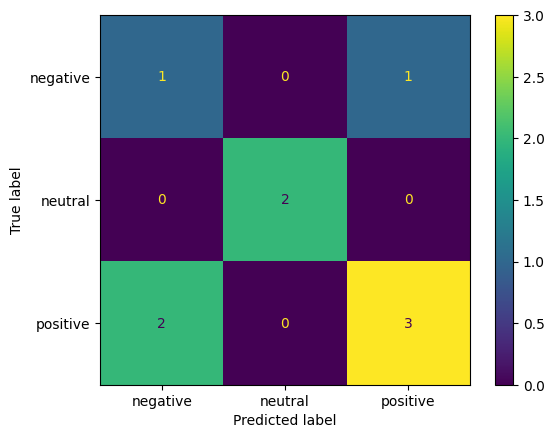

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels=["negative", "neutral", "positive"]
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
display.plot()

## Metric interpretation
Now comes the hard part: interpretation. You've just computed a wealth of numbers! The next part is up to you!
Carefully inspect all the metrics and think about what this tells us about the strengts and weaknesses of the system. 
Recall and precision often form a balance, when one goes up the other goes down. A confusion matrix can help how classes relate to each other but to really understand what is going on, it is good practice to inspect individual cases where the system failed and try to analyse why. Such insights help designing better systems or consider other features.

## End of this notebook